## n次元削減とは？PCA(主成分分析)を理解する

In [1]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#標準化
from sklearn.preprocessing import StandardScaler

X = df.loc[:, df.columns != 'species']
y = df['species'].values

#標準化
X = StandardScaler().fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pc = pca.transform(X)

In [25]:
import pandas as pd
import numpy as np

#nunpy.arrayに変換？
y = y.reshape(-1, 1)
df_pc = pd.DataFrame(np.concatenate([X_pc, y],axis=1), columns=['first component', 'second component', 'species']).astype({'first component':float, 'second component':float})

<AxesSubplot:xlabel='first component', ylabel='second component'>

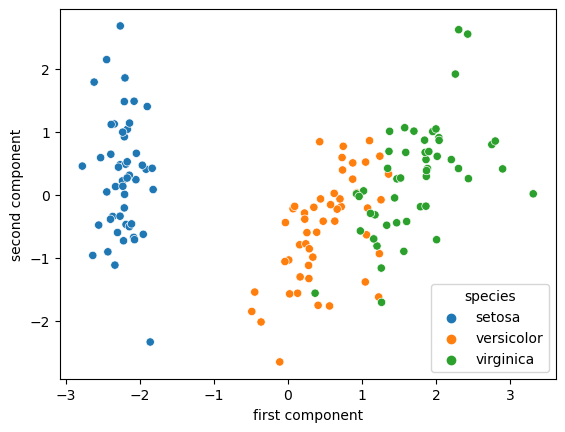

In [37]:
sns.scatterplot(x='first component', y='second component', hue='species', data=df_pc)

In [49]:
#寄与率の確認
pca = PCA(n_components=4)
pca.fit(X)

pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [30]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

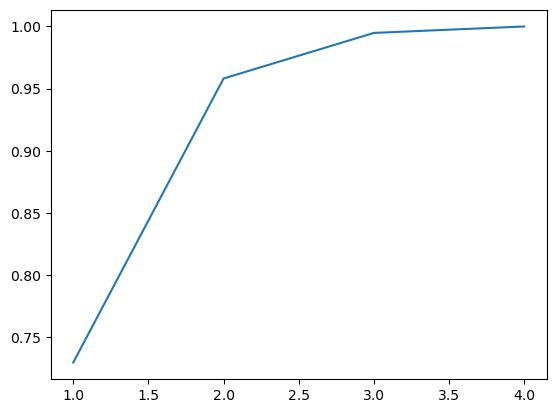

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

n_components=4
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_))
# plt.xticks(range(1, n_components+1))
# plt.xlabel('components')
# plt.ylabel('cumulative explained variance')

## PCA(主成分分析)を使ってモデル構築する(MNISTを分類)

In [52]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')

In [54]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


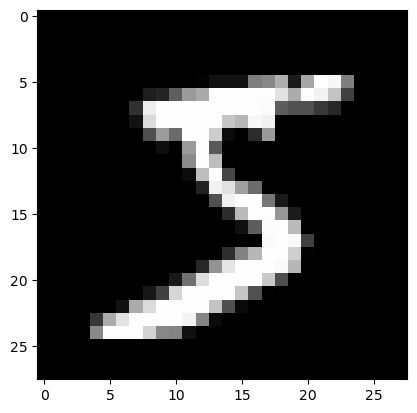

In [56]:
idx=0
im = mnist.data.loc[idx].values.reshape(28, 28)
plt.imshow(im, 'gray')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)
print(f'{X_train.shape[-1]} dimention is reduced to {X_train_pc.shape[-1]} dimention by PCA')

784 dimention is reduced to 323 dimention by PCA


In [65]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
import time
model_pca = LogisticRegression()
before = time.time()
model_pca.fit(X_train_pc, y_train)
after = time.time()
print(f'fit took {after-before:.2f}s')

fit took 3.36s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
model_pca.predict(X_test_pc[0].reshape(1, -1))

array(['0'], dtype=object)

In [71]:
y_test.iloc[0]

'0'

In [105]:
#pcaなしの場合
model = LogisticRegression()

before = time.time()
model.fit(X_train, y_train)
after  = time.time()
print(f'fit took {after-before:.2f}s')

fit took 7.27s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
#ROC
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

def all_roc(model, X_test, y_test):
    #クラス数
    n_classes = len(model.classes_)
    
    #one-hotエンコーディング
    y_test_one_hot = label_binarize(y_test, classes=list(map(str, range(n_classes))))
    predict_proba = model.predict_proba(X_test)
    
    #ROCとAUC
    fpr={}
    tpr={} 
    roc_auc={}
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predict_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    #micro平均
    fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), predict_proba.ravel())
    roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    
    #macro平均
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr = mean_tpr / n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    return fpr, tpr, roc_auc

In [106]:
fpr, tpr, roc_auc = all_roc(model, X_test, y_test)
fpr_pca, tpr_pca, roc_auc_pca = all_roc(model_pca, X_test_pc, y_test)

In [115]:
result_df = pd.DataFrame([roc_auc, roc_auc_pca]).T.rename(columns={0:'normal', 1:'pca'})

In [116]:
result_df

,normal,pca
0,0.997611,0.997578
1,0.997414,0.997493
2,0.982364,0.984333
3,0.988561,0.990357
4,0.993644,0.994467
5,0.984938,0.986218
6,0.993939,0.994818
7,0.992476,0.993346
8,0.985250,0.987956
9,0.988507,0.989675


In [117]:
result_df['pca - normal'] = result_df['pca'] - result_df['normal']
result_df

,normal,pca,pca - normal
0,0.997611,0.997578,-0.000034
1,0.997414,0.997493,0.000079
2,0.982364,0.984333,0.001970
3,0.988561,0.990357,0.001796
4,0.993644,0.994467,0.000823
5,0.984938,0.986218,0.001280
6,0.993939,0.994818,0.000878
7,0.992476,0.993346,0.000870
8,0.985250,0.987956,0.002706
9,0.988507,0.989675,0.001168


## 教師なし学習(クラスタリング)のk-means

In [118]:
import seaborn as sns

# データの取得
df = sns.load_dataset('iris')
X = df.loc[:, df.columns != 'species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [126]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

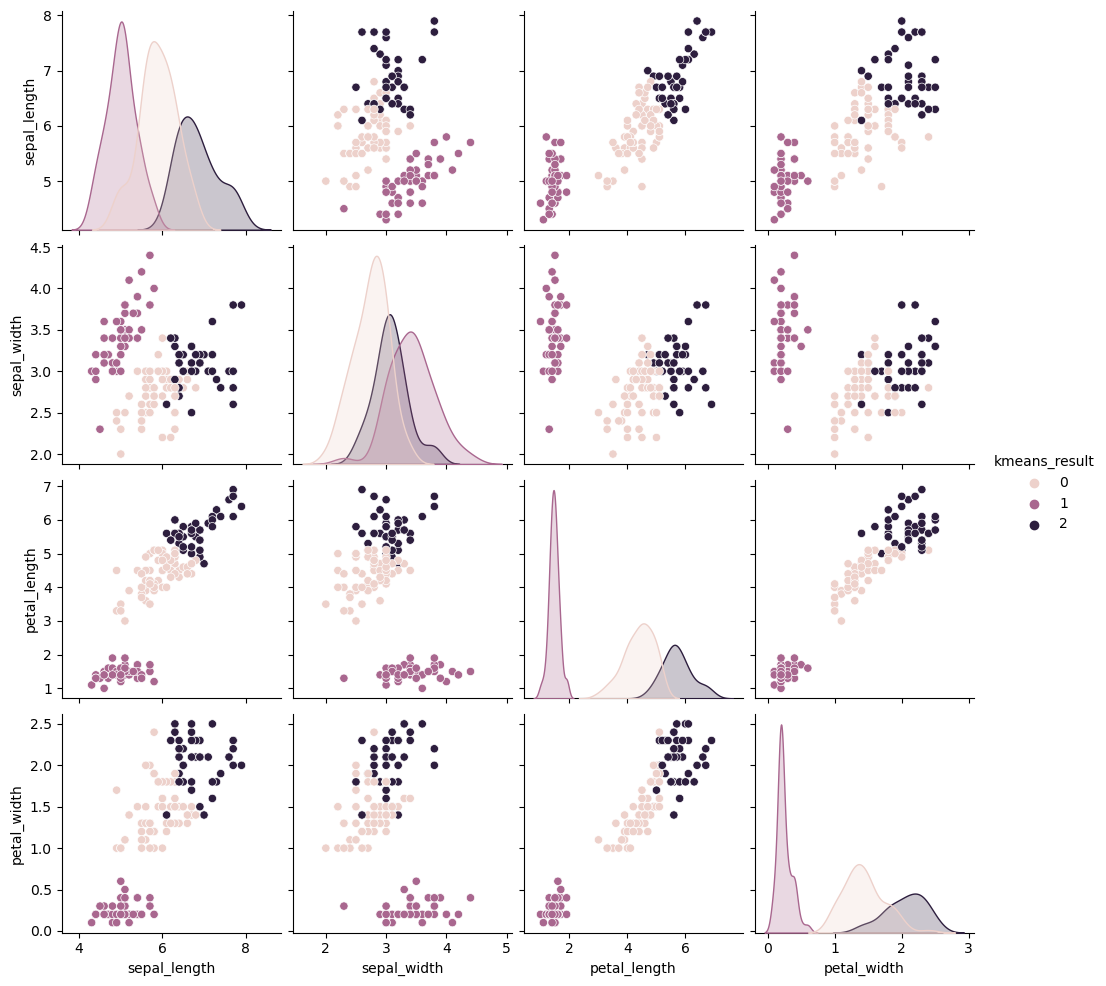

In [128]:
import pandas as pd
result_df = pd.concat([X, pd.DataFrame(labels, columns=['kmeans_result'])], axis=1)
sns.pairplot(result_df, hue='kmeans_result')

Text(0, 0.5, 'loss')

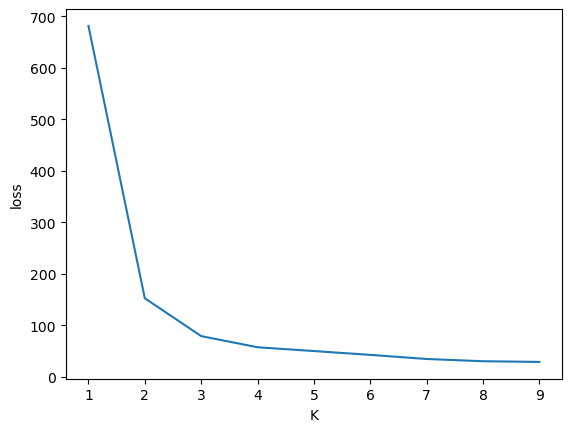

In [135]:
# n_clustersを変えて損失をplot
import matplotlib.pyplot as plt
losses = []
for K in range(1, 10):
    kmeans = KMeans(n_clusters=K, random_state=0, n_init='auto').fit(X)
    losses.append(-kmeans.score(X))
plt.plot(range(1, 10), losses)
plt.xlabel('K')
plt.ylabel('loss')

## 階層クラスタリング(Hierarchical Clustering)をわかりやすく解説

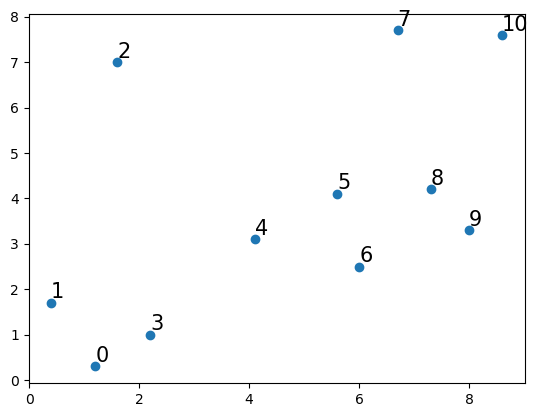

In [136]:
#データの作成(コピペ)
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# 擬似データ
x1 = np.array([1.2, 0.4, 1.6, 2.2, 4.1, 5.6, 6, 6.7, 7.3, 8, 8.6])
x2 = np.array([0.3, 1.7, 7, 1, 3.1, 4.1, 2.5, 7.7, 4.2, 3.3, 7.6])
# わかりやすいように各データに数字を振る
index = np.arange(len(x1))
X = np.array(list(zip(x1, x2)))
# 可視化
plt.plot(X[:, 0], X[:, 1], 'o')
for i in np.arange(len(x1)):
    plt.annotate(f'{i}', (x1[i], x2[i]+0.1), size=15)

In [140]:
#wardでクラスタリング
Z = linkage(X, 'ward')
Z

array([[ 8.        ,  9.        ,  1.14017543,  2.        ],
       [ 0.        ,  3.        ,  1.22065556,  2.        ],
       [ 5.        ,  6.        ,  1.64924225,  2.        ],
       [ 7.        , 10.        ,  1.90262976,  2.        ],
       [ 1.        , 12.        ,  1.92959409,  3.        ],
       [ 4.        , 13.        ,  1.97652894,  3.        ],
       [11.        , 16.        ,  3.82848969,  5.        ],
       [ 2.        , 14.        ,  7.02614166,  3.        ],
       [17.        , 18.        ,  7.81052708,  8.        ],
       [15.        , 19.        , 12.84143979, 11.        ]])

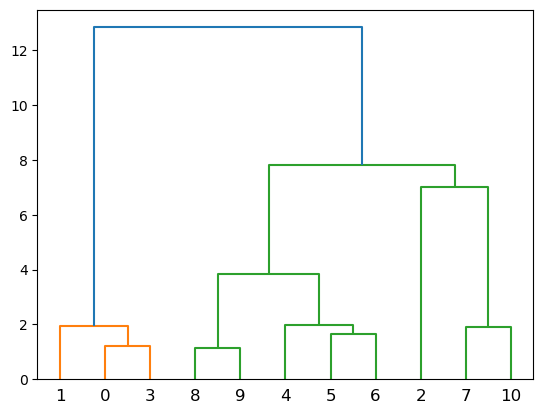

In [141]:
d = dendrogram(Z)

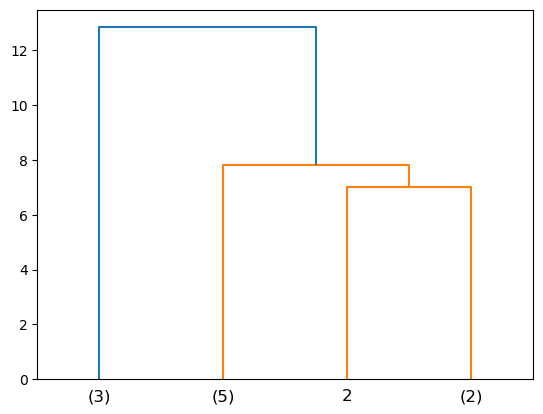

In [142]:
d = dendrogram(Z, truncate_mode='lastp', p=4)

In [148]:
#ラベルの取得
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, t=4, criterion='maxclust')
clusters

array([1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

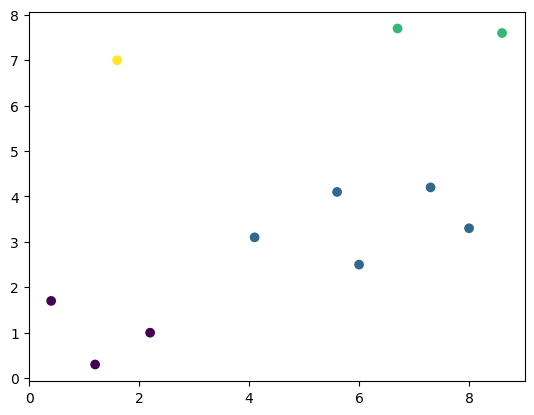

In [150]:
plt.scatter(X[:, 0], X[:, 1], c=clusters)

## 回帰の決定木アルゴリズムを完全図解する

In [153]:
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = pd.get_dummies(df, drop_first=True)
X = df.loc[:, df.columns != 'price']
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [154]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [155]:
model.predict(X_test)

array([ 4323.58386167,  5398.05755102,  5398.05755102, ...,
        8642.23927393, 15110.22501655,  9074.94366197])

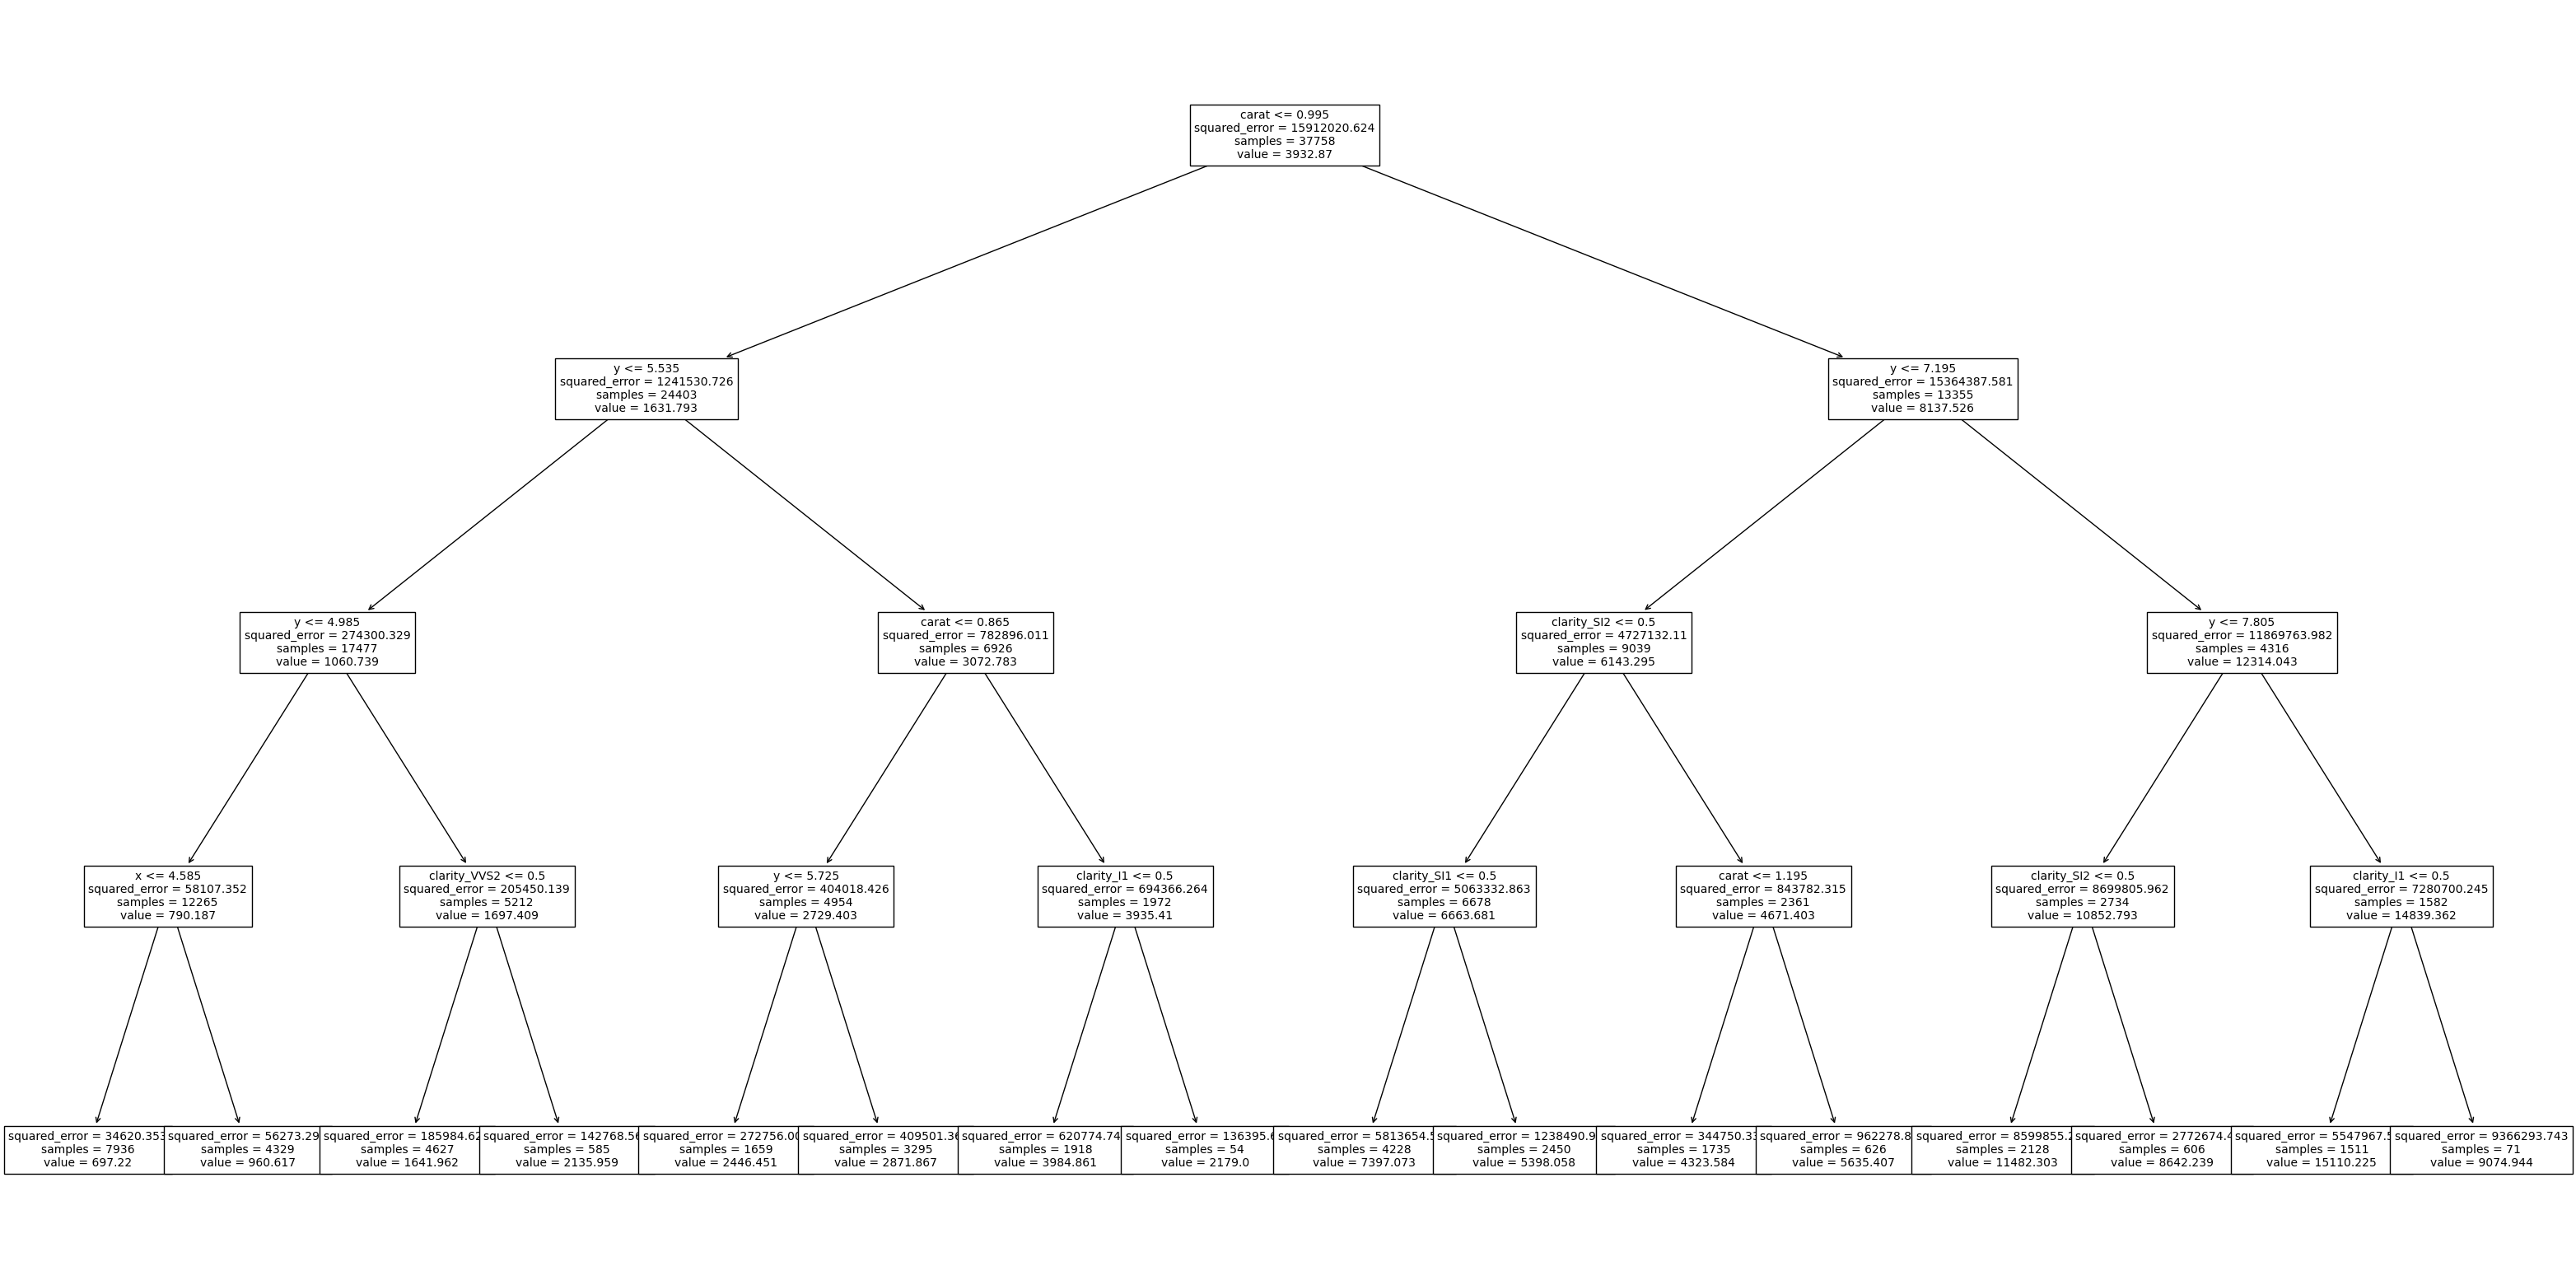

In [156]:
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=X.columns)

In [157]:
print(tree.export_text(model, feature_names=list(X.columns)))

|--- carat <= 1.00
|   |--- y <= 5.54
|   |   |--- y <= 4.98
|   |   |   |--- x <= 4.59
|   |   |   |   |--- value: [697.22]
|   |   |   |--- x >  4.59
|   |   |   |   |--- value: [960.62]
|   |   |--- y >  4.98
|   |   |   |--- clarity_VVS2 <= 0.50
|   |   |   |   |--- value: [1641.96]
|   |   |   |--- clarity_VVS2 >  0.50
|   |   |   |   |--- value: [2135.96]
|   |--- y >  5.54
|   |   |--- carat <= 0.87
|   |   |   |--- y <= 5.72
|   |   |   |   |--- value: [2446.45]
|   |   |   |--- y >  5.72
|   |   |   |   |--- value: [2871.87]
|   |   |--- carat >  0.87
|   |   |   |--- clarity_I1 <= 0.50
|   |   |   |   |--- value: [3984.86]
|   |   |   |--- clarity_I1 >  0.50
|   |   |   |   |--- value: [2179.00]
|--- carat >  1.00
|   |--- y <= 7.19
|   |   |--- clarity_SI2 <= 0.50
|   |   |   |--- clarity_SI1 <= 0.50
|   |   |   |   |--- value: [7397.07]
|   |   |   |--- clarity_SI1 >  0.50
|   |   |   |   |--- value: [5398.06]
|   |   |--- clarity_SI2 >  0.50
|   |   |   |--- carat <= 1.20
